In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#python3

### Circulo unitario frecuentista

In [9]:
def semi_circulo():
    a = np.linspace(0,np.pi,100) # 100 puntos entre 0 y pi
    return np.cos(a), np.sin(a) # devolver X y Y

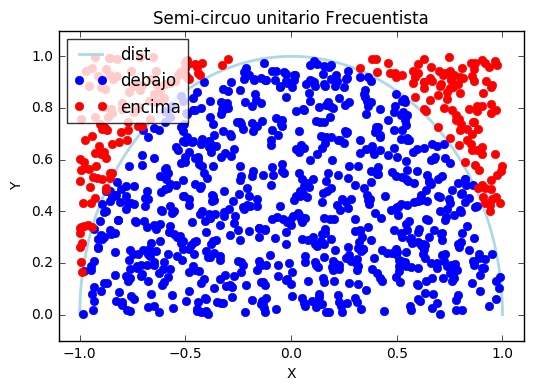

In [10]:
n = 1000 # Cantidad de numeros a genera
rNumbers = np.random.random_sample((n,2)) # Generar dos columnas de aleatorios del 0-1
x = rNumbers[:,0]*2-1.0 # Convertir la primera columna a valores x
y = rNumbers[:,1]*1.0   # Convertir la segunda columna a valores y
r = (x**2+y**2)**0.5 # hallar radio de cada punto

i_dentro = r<=1.0 # indices de puntos dentro del circulo
# Si el radio es menor a 1, estan dentro
# i_dentro es un arreglo de booleanos, donde True signifca que
# el punto de se indice, esta dentro del semicirculo

xc,yc = semi_circulo() # x,y del Semicirculo continuo


plt.figure()
plt.plot(xc, yc, color='lightblue', lw=2) # semicirculo en linea continua
plt.plot(x[i_dentro], y[i_dentro], 'o', color='blue', markeredgecolor='blue') # puntos dentro del semicirculo
plt.plot(x[~i_dentro], y[~i_dentro], 'o', color='red', markeredgecolor='red') # puntos dentro del semicirculo
plt.legend(['dist','debajo','encima'], loc='upper left', framealpha=0.8)
plt.xlim([-1.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Semi-circuo unitario Frecuentista')

### Dificultades del metodo frecuentista

In [11]:
def f_distribucion(x):
    c1 = 0.3/(0.0025*np.pi)**0.5 * np.exp(-((x-5.0)/0.05)**2)
    c2 = 0.7/np.pi**0.5*np.exp(-(x-2)**2)
    # Calculo las dos partes de la suma de la ecuacion por separado
    # y retorno el resultado
    return c1 + c2

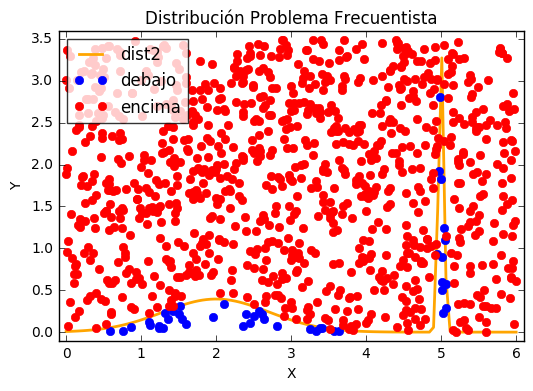

In [12]:
xd = np.linspace(0,6.0,110) # x de linea continua
yd = f_distribucion(xd) # y de linea continua


n = 1000 # Cantidad de numeros a generar
rNumbers = np.random.random_sample((n,2)) # Generar dos columnas de aleatorios del 0-1
x = rNumbers[:,0]*6.0 # Convertir la primera columna a valores x
y = rNumbers[:,1]*3.5   # Convertir la segunda columna a valores y

i_dentro = y<=f_distribucion(x) # indices de puntos dentro del circulo
# Elijo los pares de numeros aleatorios donde el y_aleatorio
# es menor al y que se obtiene de la funcion en el x_aleatorio


plt.figure()
plt.plot(xd, yd, color='orange', lw=2) # distribucion en linea continua
plt.plot(x[i_dentro], y[i_dentro], 'o', color='blue', markeredgecolor='blue') # puntos dentro del semicirculo
plt.plot(x[~i_dentro], y[~i_dentro], 'o', color='red', markeredgecolor='red') # puntos dentro del semicirculo
plt.legend(['dist2','debajo','encima'], loc='upper left', framealpha=0.8)
# limites para que se vea mejor
plt.xlim([-0.1,6.1])
plt.ylim([-0.1,3.6])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribución Problema Frecuentista')

### Histograma Frecuentista

Fraccion de puntos descartados = 95.319 %


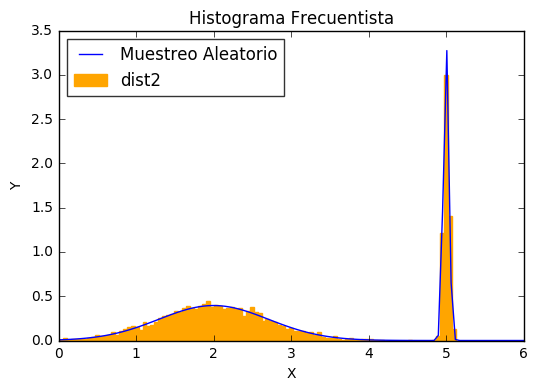

In [13]:
xd = np.linspace(0,6.0,110) # x de linea continua
yd = f_distribucion(xd) # y de linea continua


n = 100000 # Cantidad de numeros a generar
rNumbers = np.random.random_sample((n,2)) # Generar dos columnas de aleatorios del 0-1
x = rNumbers[:,0]*6.0 # Convertir la primera columna a valores x
y = rNumbers[:,1]*3.5   # Convertir la segunda columna a valores y

i_dentro = y<=f_distribucion(x) # indices de puntos dentro del circulo
# Elijo los pares de numeros aleatorios donde el y_aleatorio
# es menor al y que se obtiene de la funcion en el x_aleatorio

print("Fraccion de puntos descartados = " + str(100-100*np.sum(i_dentro)/n), "%")


x = x[i_dentro]
y = y[i_dentro]

plt.figure()
d = plt.hist(x, bins=100, color='orange',normed=True, edgecolor='orange')
plt.plot(xd, yd, color='blue', lw=1) # distribucion en linea continua
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histograma Frecuentista')
plt.legend(['Muestreo Aleatorio','dist2'], loc='upper left', framealpha=0.8)

### Metropolis Hastings

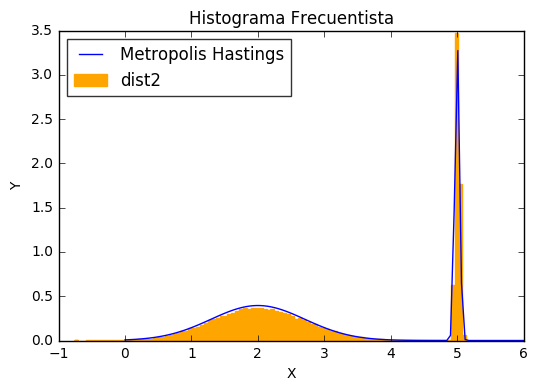

In [14]:
x0 = np.random.rand()*6.0 # Primer valor de la cadena es un numero
# aleatorio entre 0 y 6 con distribucion uniforme 

n = 100000 # Cantidad de datos
x = np.zeros(n) # Arreglo para guardar los datos
std = 0.5 # Tamano de los pasos

for i in range(1,n):
    xnew = x[i-1] + np.random.normal(0.0,std) # Nuevo x centrado en el x anterior
    # Se genera con distribucion normal
    
    a = f_distribucion(xnew)/f_distribucion(x[i-1]) # relacion de las probabilidades del x que ya tengo y el x candidato
    if a >=1 : # Si el nuevo x tiene mayor probabilidad en la distribucion que el x anterior, lo guardo
        x[i] = xnew
    else: # si no, lanzo un numero aleatorio
        if a > np.random.rand():
            x[i] = xnew # Acepto el nuevo valor con una probabilidad "a"
        else:
            x[i] = x[i-1] # si no, me mantengo en el valor anterior

            
n0 = 500
x = x[n0:] # Eliminar los primeros 500 datos de la cadena

xd = np.linspace(0,6.0,110) # x de linea continua
yd = f_distribucion(xd) # y de linea continua


plt.figure()
d = plt.hist(x, bins=100, color='orange',normed=True, edgecolor='orange')
plt.plot(xd, yd, color='blue', lw=1) # distribucion en linea continua
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histograma Frecuentista')
plt.legend(['Metropolis Hastings','dist2'], loc='upper left', framealpha=0.8)